Questions to answer about LSH

1. How to choose the number of hyperplanes? Does the Johnson-Lindenstrauss result apply?
2. How to efficiently hash new vectors?
3. How to test hashing without using elasticsearch?
4. Any other hyper-parameters?

In [69]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.neighbors import NearestNeighbors, LSHForest, KNeighborsClassifier
from sklearn.metrics import accuracy_score, jaccard_similarity_score
from sklearn.random_projection import *
from sklearn.datasets import load_iris
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

print('Done')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [12]:
iris = load_iris()
X = iris['data'][:, 0:2]
Y = iris['target']
print('2D Iris', X.shape, Y.shape)

2D Iris (150, 2) (150,)


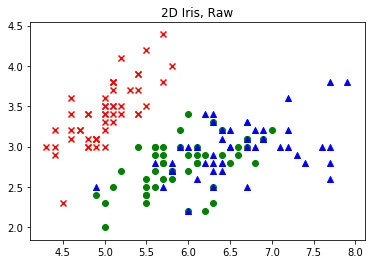

In [13]:
colors, markers = 'rgb', 'xo^'
for x, y in zip(X, Y):
    plt.scatter(x[0], x[1], color=colors[y], marker=markers[y])
plt.title('2D Iris, Raw')
plt.show()

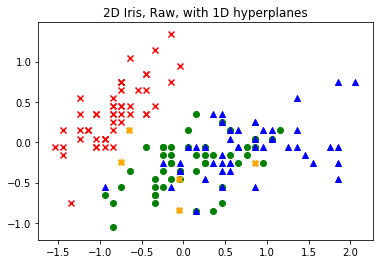

In [51]:
X_ = X - X.mean(axis=0)
for x, y in zip(X_, Y):
    plt.scatter(x[0], x[1], color=colors[y], marker=markers[y])
    
rng = np.random.RandomState(11)
H = rng.choice(X_.ravel(), size=(5, 2))
for h in H:
    plt.scatter(h[0], h[1], marker='X', color='orange')
    
plt.title('2D Iris, Raw, with 1D hyperplanes')
plt.show()

In [75]:
X_ = X - X.mean(axis=0)
H = rng.choice(X_.ravel(), size=(2 * len(X_), 2))

knn = NearestNeighbors(n_neighbors=10, metric='euclidean', algorithm='brute').fit(X_)
nbrs = knn.kneighbors(X_, return_distance=False)

X_H = (X_.dot(H.T) >= 0).astype(np.uint8)
knn = NearestNeighbors(n_neighbors=10, metric='hamming', algorithm='brute').fit(X_H)
nbrs_H = knn.kneighbors(X_H, return_distance=False)



# for n1, n2 in zip(nbrs, nbrs_H):
#     print(n1, n2, np.intersect1d(n1, n2), len(np.intersect1d(n1, n2)) / len(n1))
#     print(n1, n2, jaccard_similarity_score(n1, n2))
    



[ 0 17 27 40 43 39 26 28  4  7] [ 0  4 17 27 40 31 20 43 28 21] [ 0  4 17 27 28 40 43] 0.7
[ 1  9 37 34 25 45 12 30 35  2] [25  1 12 45 13 38 84  8  3 30] [ 1 12 25 30 45] 0.5
[ 2 29 47 30  3 24 11 12 45 37] [ 2 29 35 42 47 37  9 34 30  3] [ 2  3 29 30 37 47] 0.6
[ 3 47 29  2 30 38 42 45 12  8] [ 3 30 37 34  9 13 38 12 45  1] [ 3 12 30 38 45] 0.5
[ 4 43 40  0 17 21 26  7 19 44] [ 0  4 17 27 40 31 20 43 28 21] [ 0  4 17 21 40 43] 0.6
[ 5 16 10 48 32 18 33 19 44 46] [16  5 32 10 33 36 18 48 44 46] [ 5 10 16 18 32 33 44 46 48] 0.9
[ 6 47 22 11 24 29  2 42  3 30] [49  6 23 24 11 35 26  7 22  2] [ 2  6 11 22 24] 0.5
[26  7 39 49 43 40 23  0 17 35] [ 7 26 22 39 11 23 28 24 43 40] [ 7 23 26 39 40 43] 0.6
[ 8 38 13  3 42 47 45 12  2 29] [84  8  1 25 88 45 12 66 13 38] [ 8 12 13 38 45] 0.5
[ 9 34 37  1 30 25 12 45 35 29] [34  9 37 30  3 13 38 42 47 45] [ 9 30 34 37 45] 0.5
[10 48 16  5 36 27 20 31 21 18] [10 32 36 48 16  5 46 19 44 21] [ 5 10 16 21 36 48] 0.6
[11 24  6 26  7 29  2 49 43 40] [24

In [66]:
X_ = X - np.mean(X, axis=0)
H = rng.choice(X_.ravel(), size=(2 * len(X_), 2))

knnc = KNeighborsClassifier(metric='euclidean', algorithm='brute')
print('Exhaustive euclidean accuracy = %.5lf' % accuracy_score(Y, knnc.fit(X, Y).predict(X)))

for n in range(10, len(H) + 1, 20):
    X_H = (X_.dot(H[:n].T) >= 0).astype(np.uint8)
    knnc = KNeighborsClassifier(metric='hamming', algorithm='brute')
    print('Hamming, n = %d accuracy = %.5lf' % (
        n, accuracy_score(Y, knnc.fit(X_H, Y).predict(X_H))))

Exhaustive euclidean accuracy = 0.84667
Hamming, n = 10 accuracy = 0.76667
Hamming, n = 30 accuracy = 0.82000
Hamming, n = 50 accuracy = 0.81333
Hamming, n = 70 accuracy = 0.82667
Hamming, n = 90 accuracy = 0.83333
Hamming, n = 110 accuracy = 0.84000
Hamming, n = 130 accuracy = 0.84667
Hamming, n = 150 accuracy = 0.83333
Hamming, n = 170 accuracy = 0.84000
Hamming, n = 190 accuracy = 0.84667
Hamming, n = 210 accuracy = 0.84000
Hamming, n = 230 accuracy = 0.83333
Hamming, n = 250 accuracy = 0.81333
Hamming, n = 270 accuracy = 0.84667
Hamming, n = 290 accuracy = 0.83333
